<a href="https://colab.research.google.com/github/gorakhgupta00/Sales_Prediction_ML_Project/blob/main/Sales_Prediction_ML_Project(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -




**Project Title: Sales Prediction : Predicting sales of a major store chain Rossmann**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**   - Gorakh Gupta

# **Project Summary -**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.                     

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:

#importing libraries

#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the csv file and converting it to pandas dataframes
sales_df = pd.read_csv("/content/drive/MyDrive/Module_6/week/Day_folder/Rossmann Stores Data.csv")


In [ ]:
#Loading Store Dataset
store_df=pd.read_csv("/content/drive/MyDrive/Module_6/week/Day_folder/store.csv")

### Dataset First View

In [ ]:
#Analysing the Rossman Dataset
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

sales_df.shape

(1017209, 9)

In [ ]:
store_df.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
sales_df.duplicated().sum()

0

In [ ]:
store_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
#null values in stores df
store_df.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

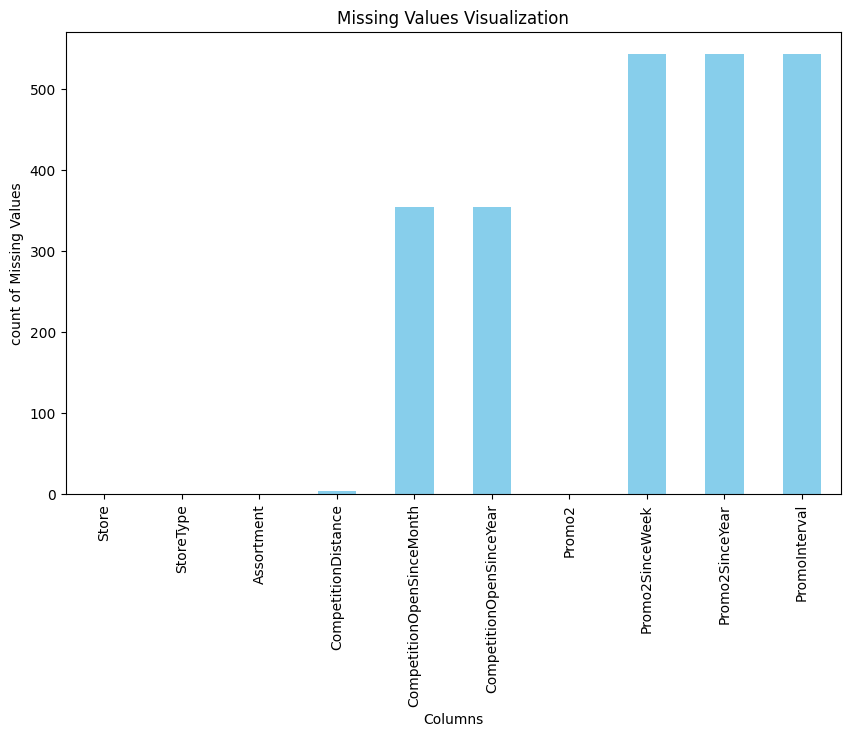

In [ ]:
# Visualizing the missing values
# Plot the missing values using a bar chart
plt.figure(figsize=(10, 6))
store_df.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Missing Values Visualization')
plt.xlabel('Columns')
plt.ylabel('count of Missing Values')
plt.show()

### What did you know about your dataset?

*  There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.

*  There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

*  Out of 1115 entries there are missing values for the columns:

*  CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

*  CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

*  CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

*   Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description


**Most of the fields are self-explanatory.**

**Id**- an Id that represents a (Store, Date) duple within the set.

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (Dependent Variable)

**Customers** - the number of customers on a given day
**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday -** indicates if the (Store, Date) was affected by the closure of public schools.

**StoreType -** differentiates between 4 different store models: a, b, c, d

**Assortment -** describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

**CompetitionDistance -** distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year] -** gives the approximate year and month of the time the nearest competitor was opened

**Promo -** indicates whether a store is running a promo on that day

**Promo2 -** Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]**- describes the year and calendar week when the store started participating in Promo2

**PromoInterval -** describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




### Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

Text(0.5, 0, 'Competition Distance Distribution plot')

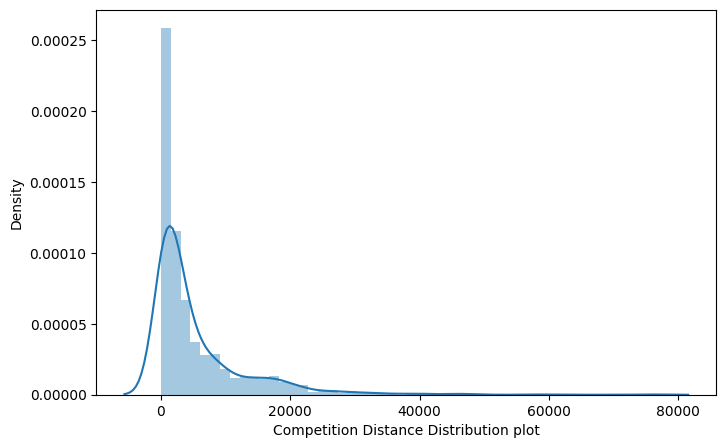

In [ ]:
# Write your code to make your dataset analysis ready.
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution plot')

**Observation:**

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.



In [ ]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)



In [ ]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#check for null values
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# **Merging the two Datasets**

In [ ]:
#merge the datasets on stores data
df = sales_df.merge(right=store_df, on="Store", how="left")

In [ ]:
cleaned_df =df.to_csv("/content/drive/MyDrive/Module_6/week/Day_folder/Retail Sales Prediction -Gorakh_Cleaned Data.csv")

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df.shape

(1017209, 18)

In [ ]:
# Check Unique Values for each variable.
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
#creating a categorical column list
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']


In [ ]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)


### What all manipulations have you done and insights you found?

Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:


*  There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week.  
There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.

*  Customers would have a positive correlation with Sales.

*  The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.

*  Promotion should be having a positive correlation with Sales.

*  Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
Stores are influenced by seasonality, probably before holidays sales would be high.

*  Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

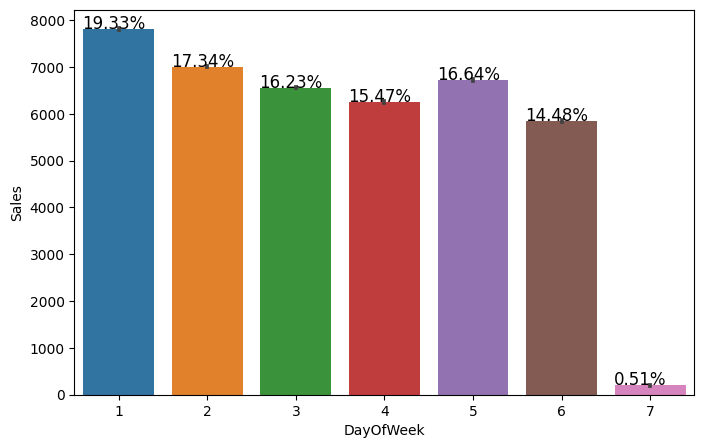

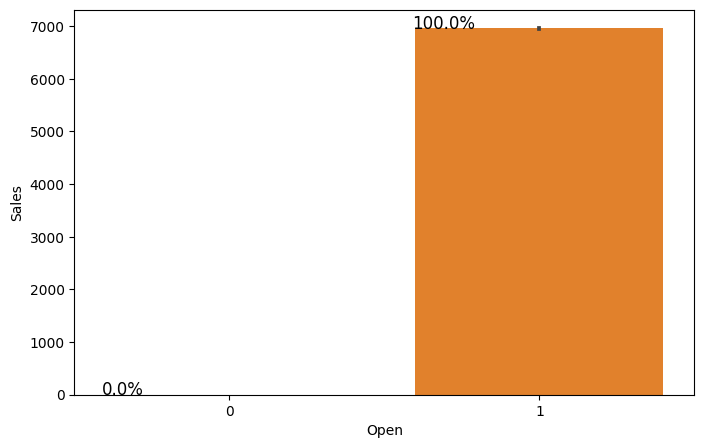

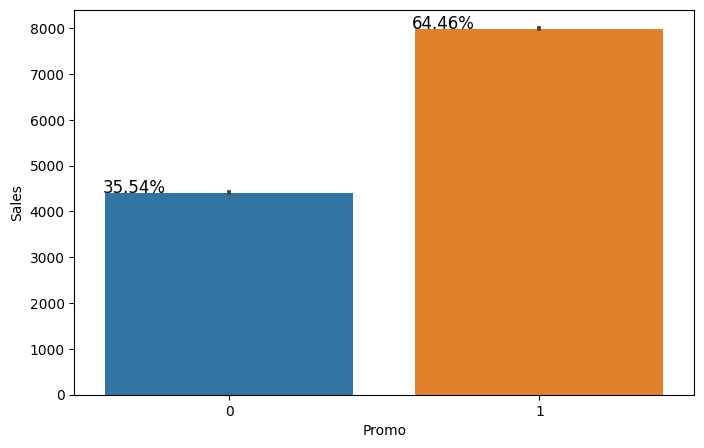

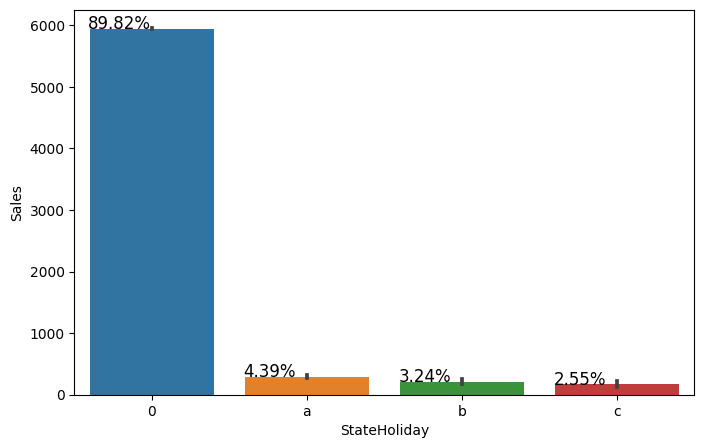

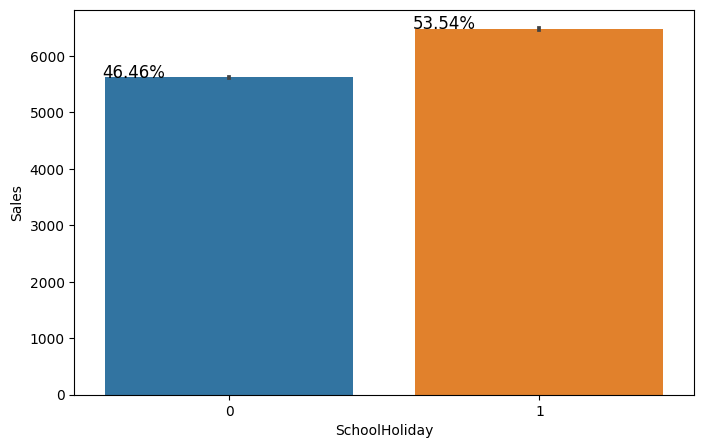

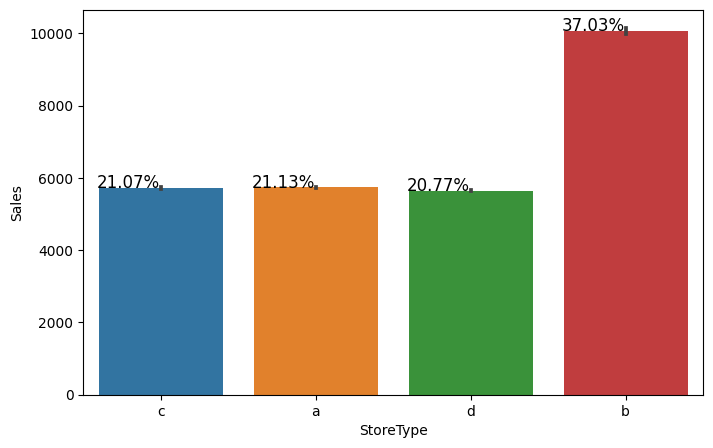

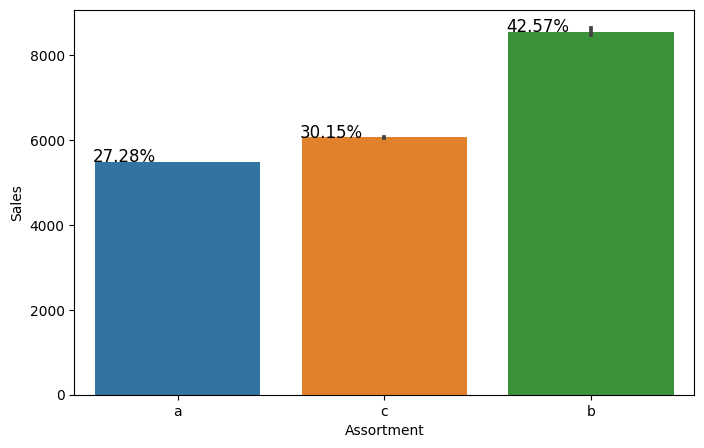

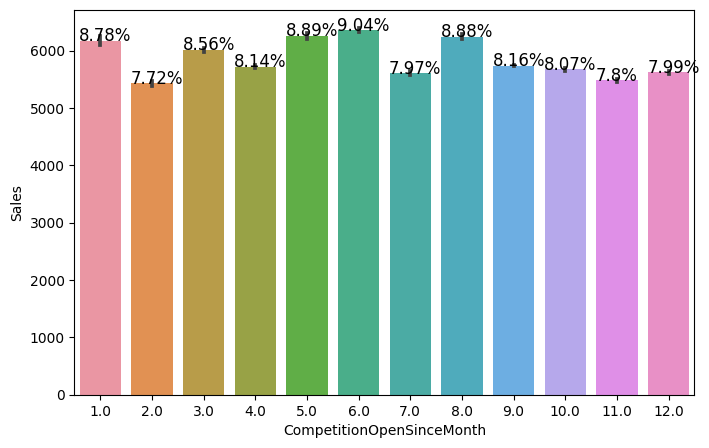

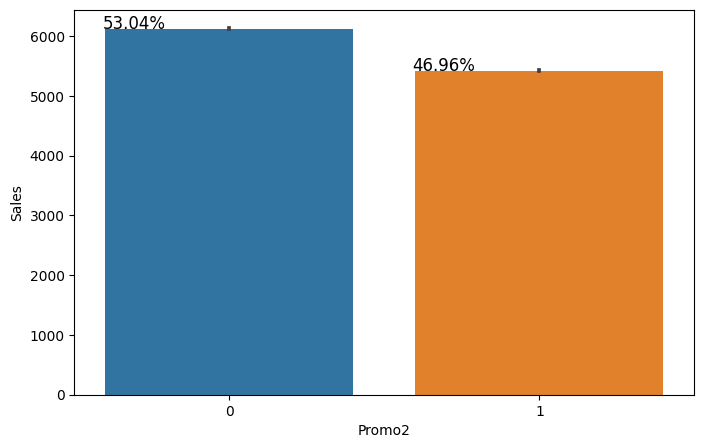

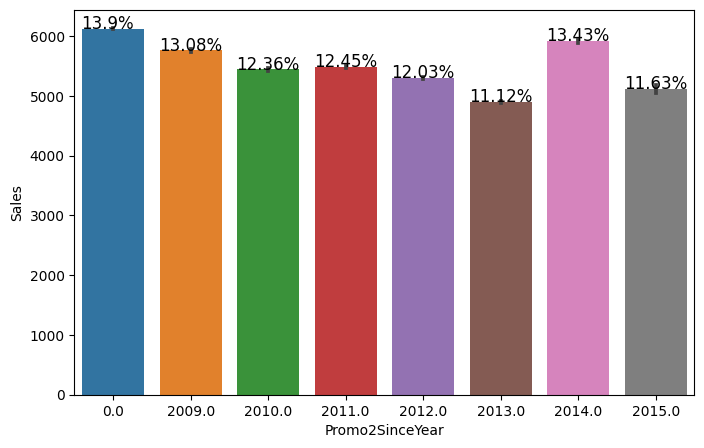

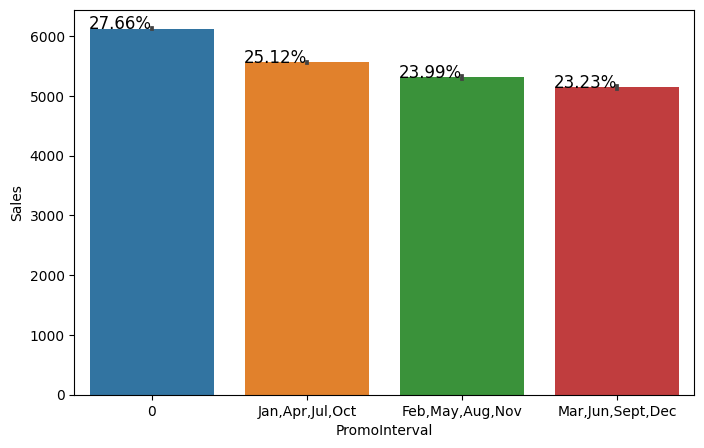

In [ ]:
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()


##### 1. Why did you pick the specific chart?

 *  Bar charts provide a clear and straightforward representation of categorical data. Each category is represented by a separate bar, making it easy to distinguish between different groups.

 *  Bar charts make it easy to compare the values of different categories. The lengths (or heights) of the bars directly correspond to the magnitudes of the data, allowing for quick and intuitive comparisons.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
* There were more sales on Monday, probably because shops generally remain closed on Sundays.

*  It could be seen that the Promo leads to more sales.

*  Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
*  Lowest of Sales were seen on state holidays especially on Christmas.
*   More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
*  On an average Store type B had the highest sales.
Highest average sales were seen with Assortment levels-b which is 'extra'.

*  With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

*  Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others

#### Chart - 2

<Axes: xlabel='Open', ylabel='Sales'>

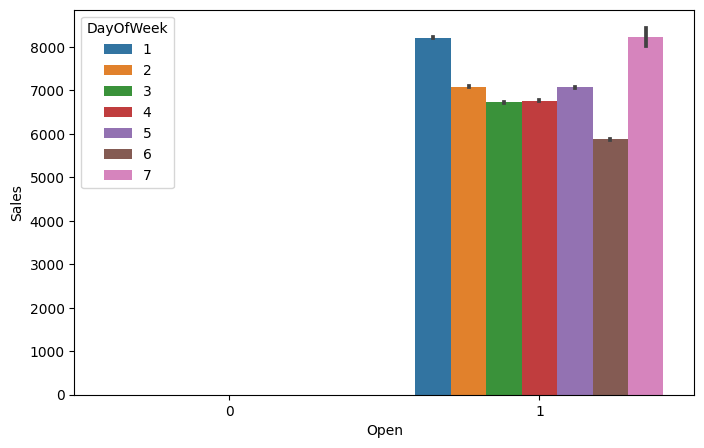

In [ ]:
# open and storetype relationship

sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

Bar charts are particularly effective when dealing with nominal or ordinal categorical variables. Nominal variables represent categories without any inherent order, while ordinal variables have a meaningful order.

##### 2. What is/are the insight(s) found from the chart?

 Open suggests that whether the store was open or closed for refurbishment and weekends or holidays

 1 represent Holidays and we can see on holidays sales are high for each day and sales are low when not holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,It is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

#### Chart - 3

<Axes: xlabel='Open', ylabel='count'>

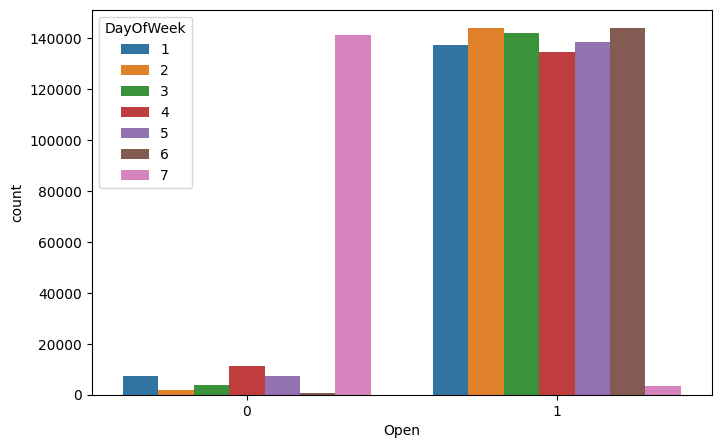

In [ ]:
#Lets see open, how many shops are open on which days

sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

A countplot is a type of bar plot used to show the counts of observations in each category of a categorical variable.

The primary purpose of a countplot is to display the frequency or count of each category in a categorical variable. It provides a quick visual summary of how often each category appears in the dataset.

##### 2. What is/are the insight(s) found from the chart?

 **Observation:**

 This gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday.

 This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays

#### Chart - 4

<Axes: xlabel='StoreType', ylabel='Sales'>

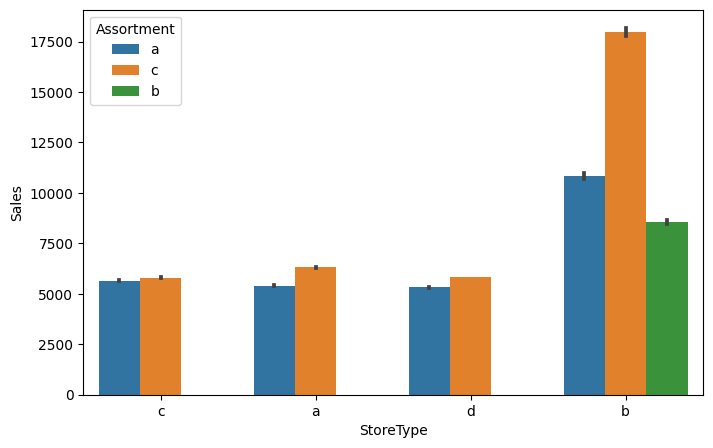

In [ ]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

##### 1. Why did you pick the specific chart?

Bar charts make it easy to compare the values of different categories. The lengths (or heights) of the bars directly correspond to the magnitudes of the data, allowing for quick and intuitive comparisons

**Observation:**

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.


But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.


Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

#### Chart - 5

In [ ]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


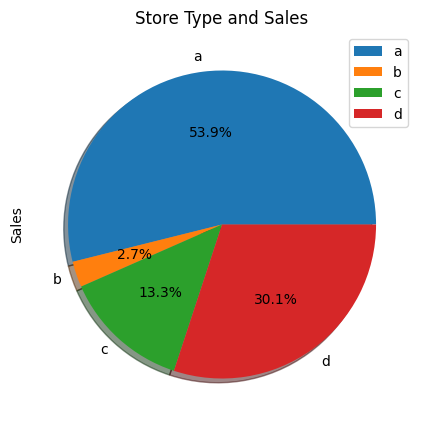

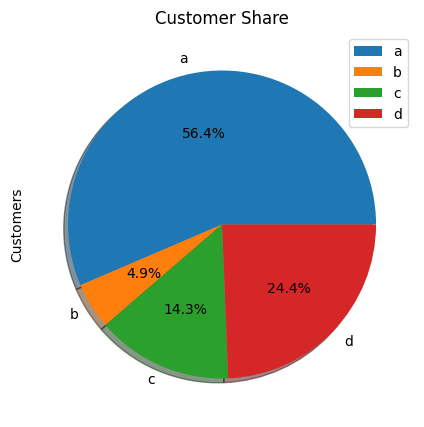

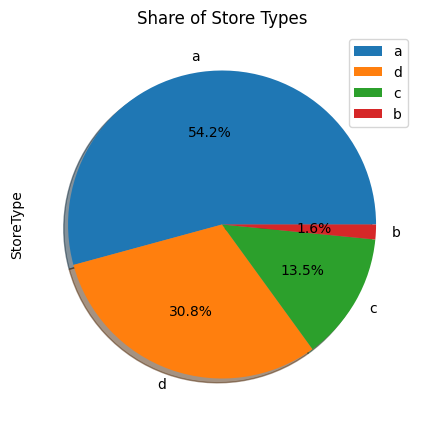

In [ ]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions. Each slice represents a proportionate part of the whole. Pie charts are commonly used to show the composition of a categorical variable as a part-to-whole relationship.

**Observation:**

*  from above chart 1 we can see store type a has highest sales while b type has lowest.
*   From chart 2 we can see in type a store has highest customer shares while b type has lowest.
*  From chart 3 store type a have highest shares.

#### Chart - 6

**Sales over time**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime format

# Extract only the year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [ ]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]


In [ ]:
# Extract only the month from the 'Date' column
df['Month'] = df['Date'].dt.month

In [ ]:
# Extract only the month from the 'Date' column
df['Week'] = df['Date'].dt.week

In [ ]:
#monthly sales
sales_2013 = sales_df_2013.groupby(df['Month'])['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby(df['Month'])['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby(df['Month'])['Sales'].sum().reset_index()


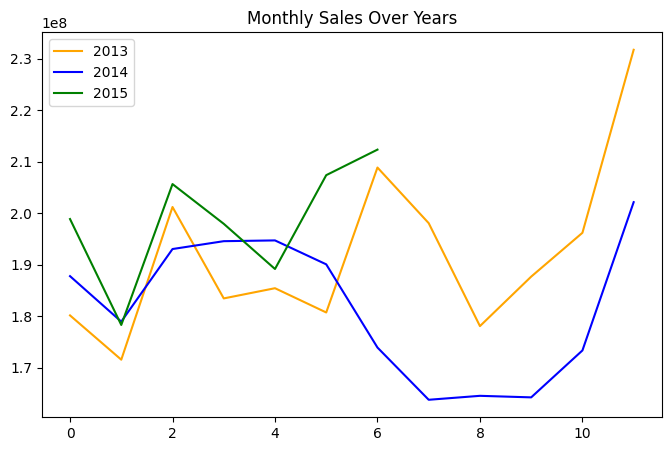

In [ ]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

##### 1. Why did you pick the specific chart?

Time is a sequential and continuous variable, and a line chart naturally represents the progression of values over time. The x-axis typically represents time, and the y-axis represents the variable of interest.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

#### Chart - 7

<Axes: xlabel='Customers', ylabel='Sales'>

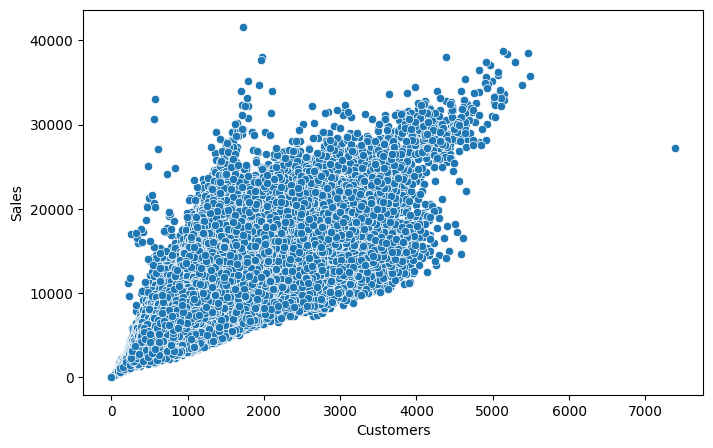

In [ ]:

#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

Scatter plots are effective in revealing patterns and trends in data. The arrangement of points on the plot can provide insights into the relationship between two variables, such as positive or negative correlation, clusters, or outliers.

Outliers, or data points that deviate significantly from the overall pattern, are easily identifiable in scatter plots. Outliers can have a substantial impact on statistical analyses, and their detection is important for understanding data integrity.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
Sales and Customer scatter plot shows a direct positive relation between them with a few outliers

#### Chart - 8

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

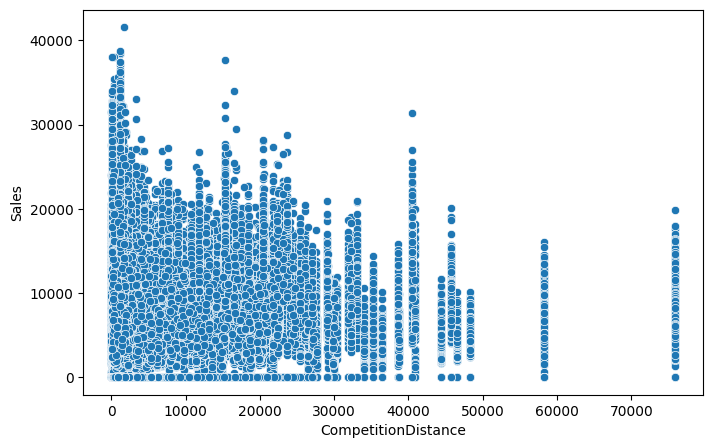

In [ ]:

#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

Scatter plots are effective in revealing patterns and trends in data. The arrangement of points on the plot can provide insights into the relationship between two variables, such as positive or negative correlation, clusters, or outliers.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away

#### Chart - 9 - Correlation Heatmap

In [ ]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = df[['Store', 'Year']]
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

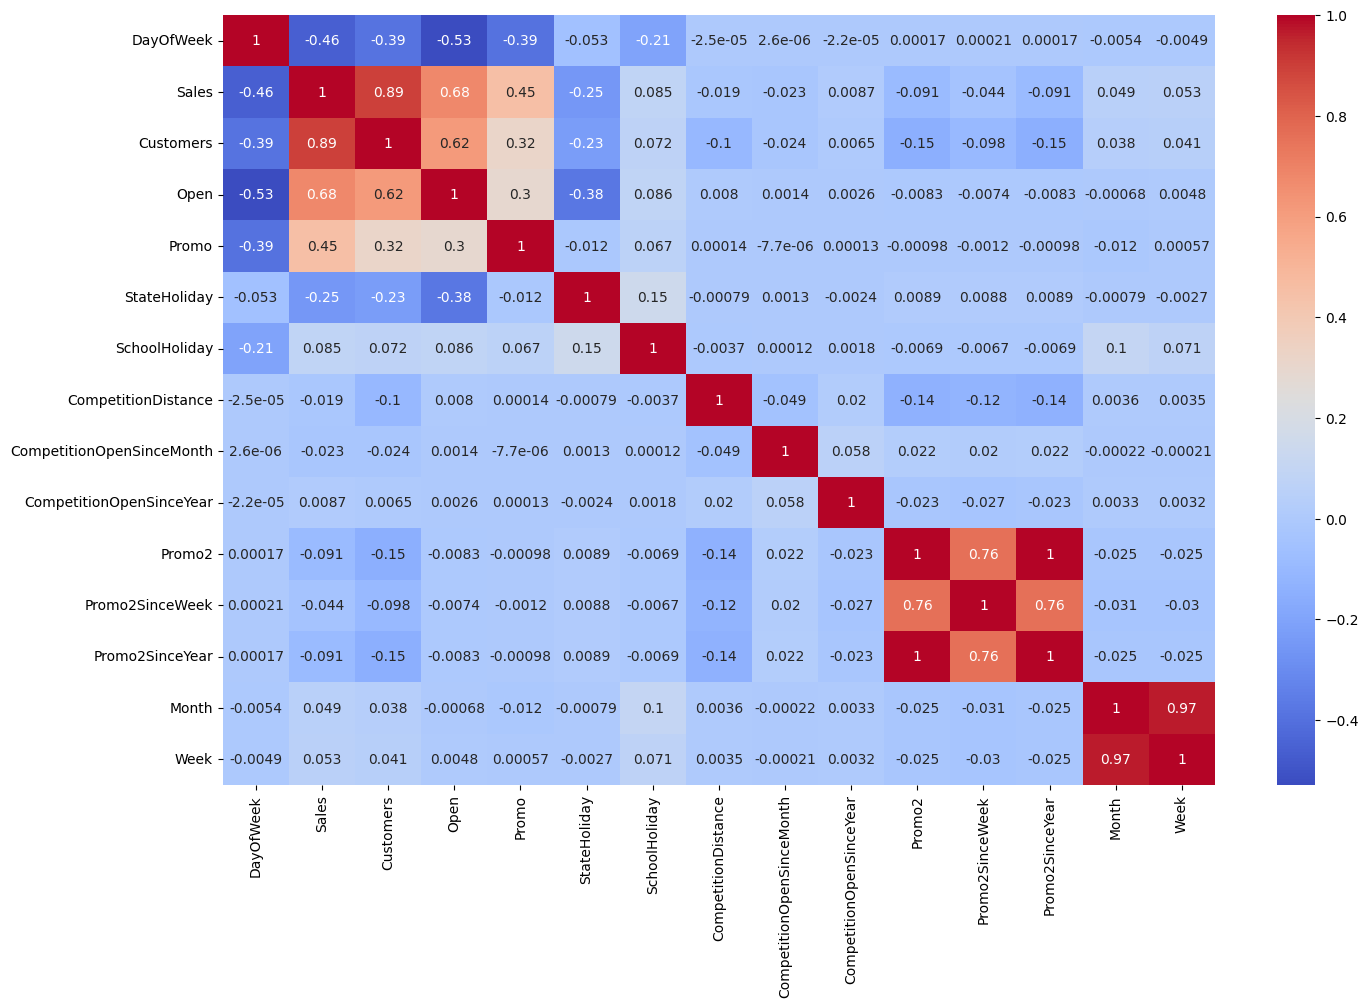

In [ ]:
# correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1.

This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
*  Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

*  CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
*  There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
*  The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

EDA Conclusions and Hypotheses Validation:
There's a positive correlation between customers and sales which is explanatory.

Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

The positive effect of promotion on Customers and Sales is observable.

It is clear that most of the stores remain closed during State and School Holidays.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 21)

In [ ]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


<Axes: ylabel='Density'>

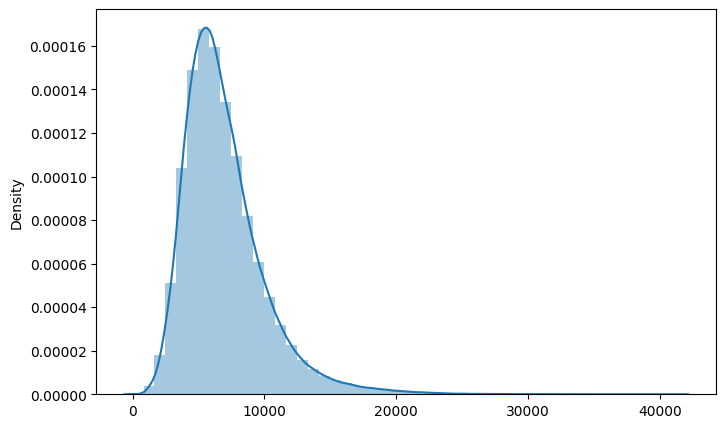

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df1['Sales'])

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# transformation
df1['Sales'] = np.log(df1['Sales'])

In [ ]:

df1.dropna(inplace=True)

In [ ]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)


<Axes: ylabel='Density'>

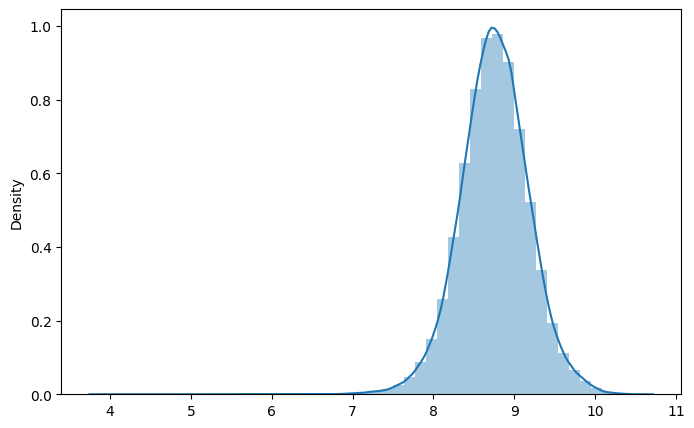

In [ ]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

In [ ]:
#changing into boolean
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)


### 6. Data Scaling

In [ ]:
#changing into boolean
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)


In [ ]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)


In [ ]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['Week'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)


In [ ]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [ ]:
df1.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  8.347590        619      0             1   
           259            2  8.832150       1444      0             1   
           262            2  9.756552       2875      0             1   
           274            2  8.039802        729      0             1   
           335            2  7.783641        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  Week  CompetitionOpen  Promo2Open  \
Date       Store                                                           
2013-01-01 85          0  2013      1     1             15.0         0.0   
           259         0  2013      1     1              0.0         0.0   
           262         0  2013      1     1              0.0         0.0   
           274         1  2013      1     1              0.0         0.0   
           335         1  2013      1     1              0.0         0.0   

                  Promo2running  
Date       Store                 
2013-01-01 85                 0  
           259                0  
           262                0  
           274                1  
           335                1

# **Outlier Detection**

**Outliers and Z score:**

Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

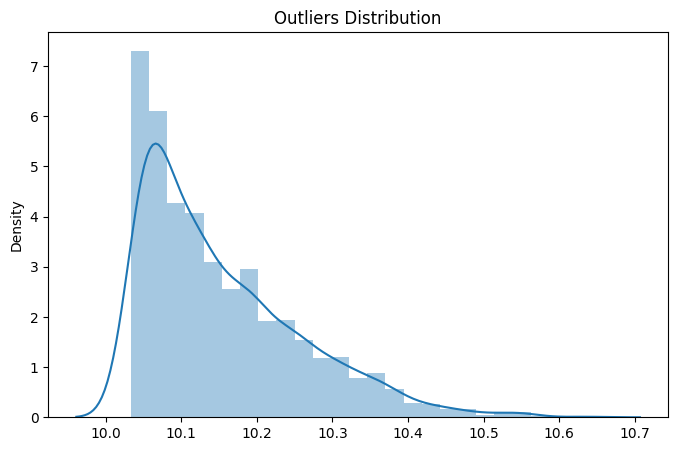

In [ ]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')


**Observation:**

The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers.



**Why Z-Score:**

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

In [ ]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')


The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [ ]:
#exploring the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Week,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,2013,1,2,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,2013,1,2,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0,0,a,c,870.0,0,2015,7,29,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0,0,b,a,1180.0,0,2015,7,29,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0,0,b,a,1180.0,0,2015,7,30,26.0,0.0,0


**Observation:**

Some interesting insights can be drawn from these outliers dataframe:

*  First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.
*  All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.

In [ ]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]


,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Week,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,26.0,0.0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

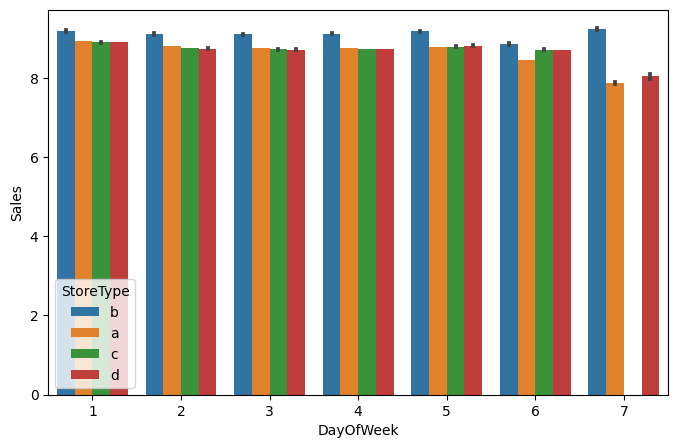

In [ ]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])


In [ ]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]


DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  Week  CompetitionOpen  Promo2Open  \
Date       Store                                                           
2013-01-06 85          0  2013      1     1             15.0    0.000000   
           259         0  2013      1     1              0.0    0.000000   
           262         0  2013      1     1              0.0    0.000000   
           274         1  2013      1     1              0.0    0.000000   
           335         1  2013      1     1              0.0    0.000000   
...                  ...   ...    ...   ...              ...         ...   
2015-07-26 733         0  2015      7    30            189.0    0.000000   
           769         1  2015      7    30             22.0   31.857534   
           948         0  2015      7    30             22.0    0.000000   
           1081        0  2015      7    30            112.0    0.000000   
           1097        0  2015      7    30            160.0    0.000000   

                  Promo2running  
Date       Store                 
2013-01-06 85                 0  
           259                0  
           262                0  
           274                1  
           335                1  
...                         ...  
2015-07-26 733                0  
           769                1  
           948                0  
           1081               0  
           1097               0  

[2216 rows x 16 columns]

**Observation:**


*  This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
*   Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

In [ ]:
# shape of dataset
df1.shape

(844338, 16)

**Outlier Treatment**

In [ ]:
#just in case something messes up
df2 = df1.copy()

In [ ]:
df2.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  8.347590        619      0             1   
           259            2  8.832150       1444      0             1   
           262            2  9.756552       2875      0             1   
           274            2  8.039802        729      0             1   
           335            2  7.783641        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  Week  CompetitionOpen  Promo2Open  \
Date       Store                                                           
2013-01-01 85          0  2013      1     1             15.0         0.0   
           259         0  2013      1     1              0.0         0.0   
           262         0  2013      1     1              0.0         0.0   
           274         1  2013      1     1              0.0         0.0   
           335         1  2013      1     1              0.0         0.0   

                  Promo2running  
Date       Store                 
2013-01-01 85                 0  
           259                0  
           262                0  
           274                1  
           335                1

In [ ]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]


In [ ]:
df2.head()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2013-01-01 85             2        619      0             1              1   
           259            2       1444      0             1              1   
           262            2       2875      0             1              1   
           274            2        729      0             1              1   
           335            2        482      0             1              1   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2013-01-01 85            b          a               1870.0       0  2013   
           259           b          b                210.0       0  2013   
           262           b          a               1180.0       0  2013   
           274           b          b               3640.0       1  2013   
           335           b          a                 90.0       1  2013   

                  Month  Week  CompetitionOpen  Promo2Open  Promo2running  \
Date       Store                                                            
2013-01-01 85         1     1             15.0         0.0              0   
           259        1     1              0.0         0.0              0   
           262        1     1              0.0         0.0              0   
           274        1     1              0.0         0.0              1   
           335        1     1              0.0         0.0              1   

                     Sales  
Date       Store            
2013-01-01 85     8.347590  
           259    8.832150  
           262    9.756552  
           274    8.039802  
           335    7.783641

**Observation:**

*  It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.
*  The primary reasons for the behaviour are promotion and store type B.
*  If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features.
*  It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

### 8. Data Splitting

In [ ]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)


In [ ]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]



In [ ]:
#store data in csv
df_train1 = df_train.to_csv("/content/drive/MyDrive/Module_6/week/Day_folder/Retail Sales Prediction -Gorakh_Cleaned Data_df_train.csv")
df_test2 = df_test.to_csv("/content/drive/MyDrive/Module_6/week/Day_folder/Retail Sales Prediction -Gorakh_Cleaned Data_df_test.csv")



In [ ]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')


The shape of X_train is: (798486, 14)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 14)
The shape of y_test is: (45852, 1)


In [ ]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = encoder.get_feature_names_out(categorical_cols)
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)



In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])


## ***7. ML Model Implementation***


**Factors affecting in choosing the model:**

Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:

*  A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as peak days, festive seasons etc which would most likely be considered as outliers in simple linearregression.
*  Having X columns with 30% continuous and 70% categorical features. Business prefers the model to be interpretable in nature and decision based algorithms work better with categorical data

### ML Model - 1

**Baseline Model: Decision Tree**

A baseline is a simple model that provides reasonable results on a task and does not require much expertise and time to build. Decision trees are used for handling non-linear data sets effectively.

In [ ]:
#Importing libraries
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']


In [ ]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results
      and creates a dataframe that compares the various models.'''

  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)


The Mean Absolute Error for the validation set is 0.348339
The Mean Squared Error for the validation set is 0.256211
The Root Mean Squared Error for the validation set is 0.506173
The R^2 for the validation set is 0.728006
The Adjusted R^2 for the validation set is 0.727858


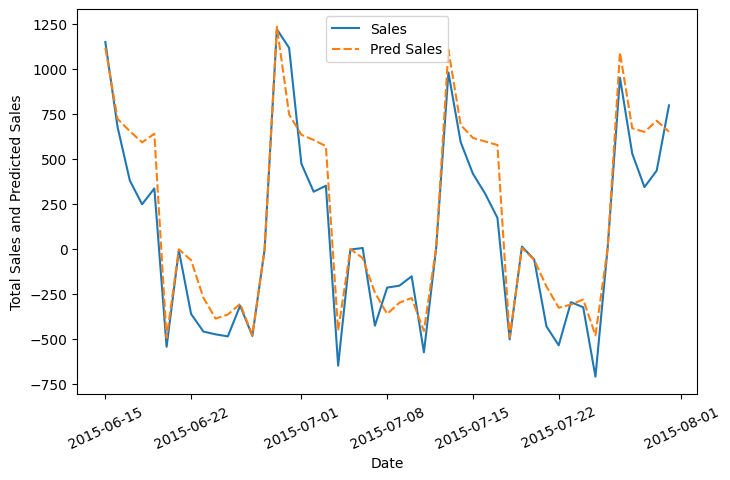

In [ ]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)


In [ ]:
#add results to comparison df
add_list_to_final_df(decision_tree)


In [ ]:

#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003878,0.003312,0.057546,0.996688,0.996688,0.348339,0.256211,0.506173,0.728006,0.727858
1,Decision Tree Regressor,0.003878,0.003312,0.057546,0.996688,0.996688,0.348339,0.256211,0.506173,0.728006,0.727858


**Observation:**
*  The baseline model- Decision tree was chosen considering our features were mostly categorical with few having continuous importance. The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points.
*  Businesses prefer the model to be interpretable in nature in order to understand the patterns and strategize accordingly unlike any scientific facility where the results matter much more than interpretability.
*  If interpretability is important then sticking with tree based algorithms when most of the features are categorical; is beneficial and using tuned Hyperparameters to grow the tree deep enough without overfitting

# **Random Forest**

In [ ]:
# importing
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# fitting
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.273762
The Mean Squared Error for the validation set is 0.144683
The Root Mean Squared Error for the validation set is 0.380373
The R^2 for the validation set is 0.846404
The Adjusted R^2 for the validation set is 0.84632


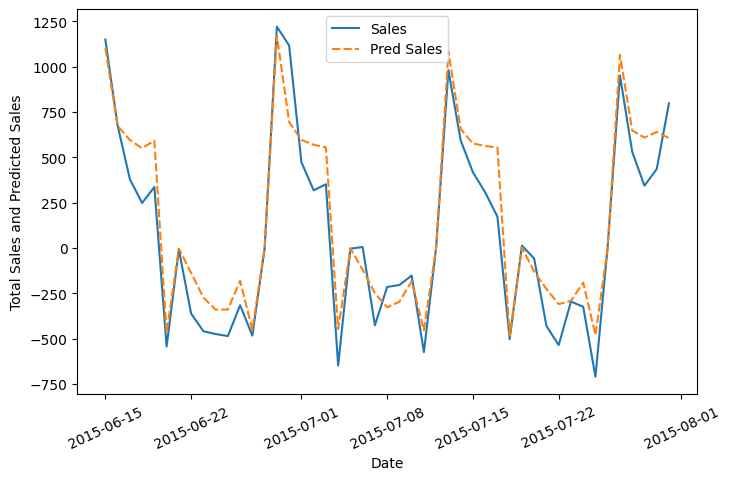

In [ ]:
#model evaluation
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [ ]:
# updating comparison df
add_list_to_final_df(random_f)


NameError: ignored

In [ ]:
#comparison df
comparison_df

In [ ]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())


Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Observation:**
Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.

In [ ]:
#creating a csv file for the cleaned dataset
#creating a csv file for the comparison dataframe
results = comparison_df.to_csv("/content/drive/MyDrive/Module_6/week/Day_folder/Retail Sales Prediction -Gorakh_Cleaned Data_Results.csv")



**Random Forest Hyperparameter Tuning**

In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#importing model
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#reading data
df2 = pd.read_csv("/content/drive/MyDrive/Module_6/week/Day_folder/Retail Sales Prediction -Gorakh_Cleaned Data.csv",parse_dates=['Date'])
comparison_df = pd.read_csv("/content/drive/MyDrive/Module_6/week/Day_folder/Retail Sales Prediction -Gorakh_Cleaned Data_Results.csv")



In [ ]:
#setting date and store as index
df2.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df2.sort_index(inplace=True)


In [ ]:
comparison_df.drop('Unnamed: 0',axis=1,inplace=True)
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003878,0.003312,0.057546,0.996688,0.996688,0.348339,0.256211,0.506173,0.728006,0.727858
1,Random Forest Regressor,0.086870,0.017783,0.133353,0.982217,0.982216,0.273762,0.144683,0.380373,0.846404,0.846320


In [ ]:
df2.head()

Unnamed: 0  DayOfWeek  Sales  Customers  Open  Promo  \
Date       Store                                                         
2013-01-01 1         1016095          2      0          0     0      0   
           2         1016096          2      0          0     0      0   
           3         1016097          2      0          0     0      0   
           4         1016098          2      0          0     0      0   
           5         1016099          2      0          0     0      0   

                 StateHoliday  SchoolHoliday StoreType Assortment  \
Date       Store                                                    
2013-01-01 1                a              1         c          a   
           2                a              1         a          a   
           3                a              1         a          a   
           4                a              1         c          c   
           5                a              1         a          a   

                  CompetitionDistance  CompetitionOpenSinceMonth  \
Date       Store                                                   
2013-01-01 1                   1270.0                        9.0   
           2                    570.0                       11.0   
           3                  14130.0                       12.0   
           4                    620.0                        9.0   
           5                  29910.0                        4.0   

                  CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date       Store                                                      
2013-01-01 1                        2008.0       0              0.0   
           2                        2007.0       1             13.0   
           3                        2006.0       1             14.0   
           4                        2009.0       0              0.0   
           5                        2015.0       0              0.0   

                  Promo2SinceYear    PromoInterval  Year  Month  Week  
Date       Store                                                       
2013-01-01 1                  0.0                0  2013      1     1  
           2               2010.0  Jan,Apr,Jul,Oct  2013      1     1  
           3               2011.0  Jan,Apr,Jul,Oct  2013      1     1  
           4                  0.0                0  2013      1     1  
           5                  0.0                0  2013      1     1

In [ ]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]


In [ ]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')


The shape of X_train is: (964804, 19)
The shape of y_train is: (964804, 1)
The shape of X_test is: (52405, 19)
The shape of y_test is: (52405, 1)


In [ ]:
# Create model
rf_tuned = RandomForestRegressor()


In [ ]:
#import
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Correct typos in random_grid
random_grid = {
    'bootstrap': [True, False],
    'max_depth': [90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 8],
    'n_estimators': [100, 130, 150]
}

# Correct typos in RandomForestRegressor initialization if needed
rf_tuned = RandomForestRegressor()

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_tuned, param_distributions=random_grid, n_iter=5, cv=3, verbose=2, random_state=20)

# Print out information before fitting
print("Random Forest Regressor:", rf_tuned)
print("Parameter Grid:", random_grid)

# Fit the model
rf_random.fit(X_train, y_train)

In [ ]:
#best para
rf_random.best_params_

In [ ]:
#save the best parameters
random_t = rf_random.best_estimator_

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']


In [ ]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results
      and creates a dataframe that compares the various models.'''

  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]



In [ ]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)


In [ ]:
#add to comparison_df
comparison_df = comparison_df.append(random_tuned)


In [ ]:
#comparison_df
comparison_df

**Feature Importance**

In [ ]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])


**Model Performance and Evaluation**

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

In [ ]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])



**Random Forest vs Baseline Model**


In [ ]:

#test values
baseline_r2 = 0.915750
random_r2 = 0.955673
r_tuned_r2 = 0.955878

In [ ]:
#improvement %
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')


**Random Forest Tuned vs Baseline and Random Forest Models**

In [ ]:
#improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')


In [ ]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')


**Observation**

*  The maximum R^2 was seen in tuned Random Forest model with the value 0.955878 which was only 0.021% improved from a simple random forest model.
*  It seems like we have maxed out on performance with the data and these models.

**Store wise Sales Predictions**

In [ ]:
#predictions
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()


In [ ]:
#head
six_weeks_sales_df.head()

In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data
cleaned_unscaled_data= pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/Retail Sales Prediction - Vithika Karan/Cleaned Data/Cleaned_Unscaled_data.csv")
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])


In [ ]:
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])


In [ ]:
#sales vs predictions
six_weeks_sales_df.head()

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-06-15',5)]


In [ ]:
#locating
six_weeks_sales_df.loc[('2015-07-28',56)]


# **Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.
Some important conclusions drawn from the analysis are as follows:

*  There were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
*   The positive effect of promotion on Customers and Sales is observable.
*  Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***